Сторона куба = 216.896855
Углы вращения: X=4.283350  Y=2.156099  Z=4.538972
Матрица вращения:
[[ 0.09532532 -0.54416574  0.83354468]
 [ 0.5405493  -0.67484787 -0.50238114]
 [ 0.83589446  0.49846163  0.22981831]]
Центр куба: X=254.084399 Y=282.420584
Координаты вершин: 
[[  94.47335748  360.5633127   -60.83760019]
 [ 211.71679968  214.1909314  -169.80248929]
 [ 232.39256233   96.16309437   10.99073052]
 [ 115.14912013  242.53547568  119.95561962]
 [ 275.7762364   468.67807341  -10.99073052]
 [ 393.0196786   322.30569211 -119.95561962]
 [ 413.69544124  204.27785508   60.83760019]
 [ 296.45199905  350.65023639  169.80248929]]
Куб сгенерирован на итерации 417


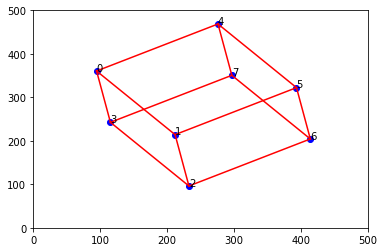

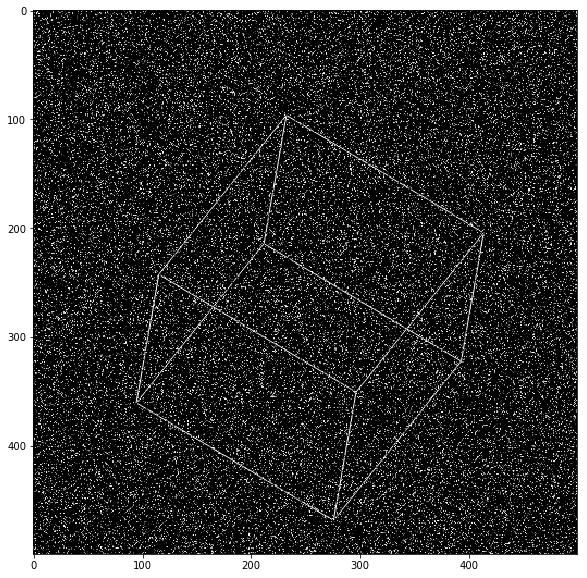

In [1]:
import numpy as np
from math import pi, cos, sin, sqrt, fabs, floor
from matplotlib import pyplot as plt
from matplotlib import pylab
import sys
%matplotlib inline

def generate_cube():
    """Генерация куба"""
    cube = {}
    
    # Сторона куба
    cube['a'] = np.random.uniform(150, 300)

    # Углы вращения
    cube['alpha'] = np.random.uniform(0, 2*pi)
    cube['beta'] = np.random.uniform(0, 2*pi)
    cube['gamma'] = np.random.uniform(0, 2*pi)

    # Матрицы вращения
    cube['Rx'] = np.array([[1, 0, 0], [0,cos(cube['alpha']), -sin(cube['alpha'])], [0, sin(cube['alpha']), cos(cube['alpha'])]])
    cube['Ry'] = np.array([[cos(cube['beta']), 0, sin(cube['beta'])], [0, 1, 0], [-sin(cube['beta']), 0, cos(cube['beta'])]])
    cube['Rz'] = np.array([[cos(cube['gamma']), -sin(cube['gamma']), 0], [sin(cube['gamma']), cos(cube['gamma']), 0], [0, 0, 1]])
    cube['R'] = np.dot(np.dot(cube['Rx'], cube['Ry']), cube['Rz'])

    # Центр куба
    cube['x'] = np.random.uniform(0, 500)
    cube['y'] = np.random.uniform(0, 500)

    # Координаты вершин
    a = cube['a']
    cube['coords'] = np.array([[-a/2, -a/2, -a/2], [-a/2, a/2, -a/2], [a/2, a/2, -a/2], [a/2, -a/2, -a/2], 
                       [-a/2, -a/2, a/2], [-a/2, a/2, a/2], [a/2, a/2, a/2], [a/2, -a/2, a/2]])
    cube['coords'] = np.dot(cube['coords'], cube['R'])
    cube['coords'][:, 0] += cube['x']
    cube['coords'][:, 1] += cube['y']
    
    return cube


def distXY(pA, pB):
    """Расстояние между проекциями точек в плоскости OXY"""
    return sqrt((pA[0] - pB[0])**2 + (pA[1] - pB[1])**2)


def distToLine(p, pA, pB):
    """Расстояние от точки до прямой, заданной двумя точками"""
    u = pA - p
    v = pB - p
    s = fabs(u[0]*v[1]-u[1]*v[0])
    return s/distXY(pA, pB)


def validate_cube(cube):
    """Проверка куба на нарушений ограничений"""
    # Проверка на выход за границы изображения
    for point in cube['coords']:
        if point[0]<0 or point[0]>=500 or point[1]<0 or point[1]>=500:
            return False
        
    # Проверка на близость вершин
    for pA in cube['coords']:
        for pB in cube['coords']:
            if not np.array_equal(pA, pB) and distXY(pA, pB)<100:
                return False
    
    # Проверка на близость параллельных ребер
    parallels = [[[0, 1], [2, 3], [4, 5], [6, 7]], [[0, 3], [1, 2], [4, 7], [5, 6]], [[0, 4], [1, 5], [2, 6], [3, 7]]]
    for group in parallels:
        for l1 in group:
            for l2 in group:
                if not np.array_equal(l1, l2):
                    if distToLine(cube['coords'][l1[0]], cube['coords'][l2[0]], cube['coords'][l2[1]])<50:
                        return False
    return True
        
cube = {}
iters = 0
while True:
    iters += 1
    cube = generate_cube()
    if validate_cube(cube):
        print('Сторона куба = %f' % cube['a'])
        print('Углы вращения: X=%f  Y=%f  Z=%f' % (cube['alpha'], cube['beta'], cube['gamma']))
        print('Матрица вращения:')
        print(cube['R'])
        print('Центр куба: X=%f Y=%f' % (cube['x'], cube['y']))
        print('Координаты вершин: ')
        print(cube['coords'])
        print('Куб сгенерирован на итерации %d' % iters)
        break

# Рисуем куб
class Edge:
    def __init__(self, x1, y1, x2, y2):
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2
        
edges = []
for i in range(4):
    j = (i+1)%4
    edges.append(Edge(cube['coords'][i, 0], cube['coords'][i, 1], cube['coords'][i+4, 0], cube['coords'][i+4, 1]))
    edges.append(Edge(cube['coords'][i, 0], cube['coords'][i, 1], cube['coords'][j, 0], cube['coords'][j, 1]))
    edges.append(Edge(cube['coords'][i+4, 0], cube['coords'][i+4, 1], cube['coords'][j+4, 0], cube['coords'][j+4, 1]))

plt.figure()
plt.axis([0, 500, 0, 500])
plt.scatter(cube['coords'][:, 0], cube['coords'][:, 1], color='blue')
for i in range(8):
    plt.annotate(i, (cube['coords'][i, 0], cube['coords'][i, 1]))
for edge in edges:
    plt.plot([edge.x1, edge.x2], [edge.y1, edge.y2], color='red')
plt.show()

image = np.zeros((500, 500))

def plot(x, y, c):
    image[y][x] = c*255

def ipart(x):
    return floor(x)

def round(x):
    return ipart(x + 0.5)

def fpart(x):
    return x - floor(x)

def rfpart(x):
    return 1 - fpart(x)

def drawLine(x0,y0,x1,y1):
    steep = fabs(y1 - y0) > fabs(x1 - x0)
    
    if steep:
        x0, y0 = y0, x0
        x1, y1 = y1, x1
        
    if x0 > x1:
        x0, x1 = x1, x0
        y0, y1 = y1, y0
    
    dx = x1 - x0
    dy = y1 - y0
    gradient = dy / dx
    if dx == 0.0:
        gradient = 1.0

    # handle first endpoint
    xend = round(x0)
    yend = y0 + gradient * (xend - x0)
    xgap = rfpart(x0 + 0.5)
    xpxl1 = xend
    ypxl1 = ipart(yend)
    if steep:
        plot(ypxl1,   xpxl1, rfpart(yend) * xgap)
        plot(ypxl1+1, xpxl1,  fpart(yend) * xgap)
    else:
        plot(xpxl1, ypxl1  , rfpart(yend) * xgap)
        plot(xpxl1, ypxl1+1,  fpart(yend) * xgap)
    intery = yend + gradient
    
    # handle second endpoint
    xend = round(x1)
    yend = y1 + gradient * (xend - x1)
    xgap = fpart(x1 + 0.5)
    xpxl2 = xend
    ypxl2 = ipart(yend)
    if steep:
        plot(ypxl2  , xpxl2, rfpart(yend) * xgap)
        plot(ypxl2+1, xpxl2,  fpart(yend) * xgap)
    else:
        plot(xpxl2, ypxl2,  rfpart(yend) * xgap)
        plot(xpxl2, ypxl2+1, fpart(yend) * xgap)
    
    # main loop
    if steep:
        for x in range(xpxl1 + 1, xpxl2):
            plot(ipart(intery)  , x, rfpart(intery))
            plot(ipart(intery)+1, x,  fpart(intery))
            intery = intery + gradient
    else:
        for x in range(xpxl1 + 1, xpxl2):
            plot(x, ipart(intery),  rfpart(intery))
            plot(x, ipart(intery)+1, fpart(intery))
            intery = intery + gradient

for edge in edges:
    drawLine(edge.x1, edge.y1, edge.x2, edge.y2)

p = 0.2
for y in range(500):
    for x in range(500):
        if np.random.random() < p:
            image[y, x] = np.random.random() * 256

pylab.figure(figsize=(10, 10))
pylab.imshow(image, cmap='gray')

def save_pgm(pgmf, image):
    pgmf.write('P5\n'.encode())
    pgmf.write('500 500\n'.encode())
    pgmf.write('255\n'.encode())
    pgmf.write(bytearray([int(x) for x in image.flatten()]))
    
    
save_pgm(open('image.pgm', mode='wb'), image)